In [5]:
!pip install pandas numpy scikit-learn imbalanced-learn xgboost shap matplotlib seaborn

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 388.9 kB/s eta 0:05:22
   ---------------------------------------- 0.1/124.9 MB 726.2 kB/s eta 0:02:52
   ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:22
 

In [6]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.0/11.1 MB 495.5 kB/s eta 0:00:23
   ---------------------------------------- 0.1/11.1 MB 655.4 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.1 MB 952.6 kB/s eta 0:00:12
   ------------- -------------------------- 3.8/11.1 MB 17.3 MB/s eta 0:00:01
   ---------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\UoW_Apps\\anaconda3\\Lib\\site-packages\\~klearn\\__check_build\\_check_build.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

In [3]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/238.4 kB 409.6 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/238.4 kB 476.3 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/238.4 kB 654.6 kB/s eta 0:00:01
   -------------------------------------- 238.4/238.4 kB 912.6 kB/s eta 0:00:00
  Attempting unins

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
data = pd.read_csv(r"C:\Users\w1801578\Documents\prosperLoanData.csv")

In [5]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


# Data Cleaning

In [7]:
relevant_columns = [
    "LoanStatus", "Term", "LoanOriginalAmount", "BorrowerRate", 
    "CreditScoreRangeLower", "CreditScoreRangeUpper", "DebtToIncomeRatio", 
    "RevolvingCreditBalance", "EmploymentStatus", "IncomeRange", 
    "IsBorrowerHomeowner", "DateCreditPulled", "FirstRecordedCreditLine"
]

data = data[relevant_columns]

print("Summary Statistics for Numerical Features:\n", data.describe())
print("\nSummary Statistics for All Features:\n", data.describe(include='all'))

Summary Statistics for Numerical Features:
                 Term  LoanOriginalAmount   BorrowerRate  \
count  113937.000000        113937.00000  113937.000000   
mean       40.830248          8337.01385       0.192764   
std        10.436212          6245.80058       0.074818   
min        12.000000          1000.00000       0.000000   
25%        36.000000          4000.00000       0.134000   
50%        36.000000          6500.00000       0.184000   
75%        36.000000         12000.00000       0.250000   
max        60.000000         35000.00000       0.497500   

       CreditScoreRangeLower  CreditScoreRangeUpper  DebtToIncomeRatio  \
count          113346.000000          113346.000000      105383.000000   
mean              685.567731             704.567731           0.275947   
std                66.458275              66.458275           0.551759   
min                 0.000000              19.000000           0.000000   
25%               660.000000             679.000000   

#### Handing Missing Data 

In [11]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

numerical_features=["LoanOriginalAmount", "BorrowerRate", "CreditScoreRangeLower", "CreditScoreRangeUpper", "DebtToIncomeRatio", "RevolvingCreditBalance"]
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])

categorical_features=["EmploymentStatus", "IncomeRange"]
data[categorical_features]=data[categorical_features].fillna("Missing")

### Feature Engineering 

Combining Credit Score Columns 

In [12]:
data["CreditScore"] = data[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].mean(axis=1)
data.drop(["CreditScoreRangeLower","CreditScoreRangeUpper"],axis=1, inplace=True)

Creating CreditHistoryLength Feature 

In [13]:
data["DateCreditPulled"] = pd.to_datetime(data["DateCreditPulled"], errors="coerce")
data["FirstRecordedCreditLine"]= pd.to_datetime(data["FirstRecordedCreditLine"], errors="coerce")
data["CreditHistoryLength"]=(data["DateCreditPulled"]- data["FirstRecordedCreditLine"]).dt.days/365

Scale numerical features

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = ["LoanOriginalAmount", "BorrowerRate",  "DebtToIncomeRatio", "RevolvingCreditBalance","CreditHistoryLength", "CreditScore"]
data[scaled_features] = scaler.fit_transform(data[scaled_features])

Encoding categorical variables 

In [15]:
data = pd.get_dummies(data,columns=["EmploymentStatus","IncomeRange", "IsBorrowerHomeowner"], drop_first=True)

### Handling Class Imbalance using SMOTE

In [16]:
print("Original LoanStatus Distribution:")
print(data["LoanStatus"].value_counts())

Original LoanStatus Distribution:
LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64


Converting Loan Status to binary variables

In [17]:
status_mapping = {
    "Chargedoff": 1, "Defaulted": 1, 
    "Fully Paid": 0, "Completed": 0
}
data["LoanStatus"] = data["LoanStatus"].map(status_mapping)

In [18]:
print(data["LoanStatus"].value_counts())

LoanStatus
0.0    38074
1.0    17010
Name: count, dtype: int64


In [19]:
data = data.dropna(subset=["LoanStatus"])

In [20]:
X = data.drop(columns=["LoanStatus"])

In [21]:
X = X.drop(columns=["DateCreditPulled", "FirstRecordedCreditLine"], errors="ignore")

Target variable

In [22]:
y = data["LoanStatus"]

In [23]:
# Check for missing values before SMOTE
print("Missing values before handling:")
print(X.isnull().sum())

# Handle missing values
num_imputer = SimpleImputer(strategy="median")  # Fill numerical NaNs with median
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Check class balance after SMOTE
print("\nLoanStatus distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Missing values before handling:
Term                                  0
LoanOriginalAmount                    0
BorrowerRate                          0
DebtToIncomeRatio                     0
RevolvingCreditBalance                0
CreditScore                           0
CreditHistoryLength               26971
EmploymentStatus_Full-time            0
EmploymentStatus_Missing              0
EmploymentStatus_Not available        0
EmploymentStatus_Not employed         0
EmploymentStatus_Other                0
EmploymentStatus_Part-time            0
EmploymentStatus_Retired              0
EmploymentStatus_Self-employed        0
IncomeRange_$1-24,999                 0
IncomeRange_$100,000+                 0
IncomeRange_$25,000-49,999            0
IncomeRange_$50,000-74,999            0
IncomeRange_$75,000-99,999            0
IncomeRange_Not displayed             0
IncomeRange_Not employed              0
IsBorrowerHomeowner_True              0
dtype: int64

LoanStatus distribution after SMOT

# Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


Evaluating Performance

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.65     11423
         1.0       0.65      0.68      0.67     11422

    accuracy                           0.66     22845
   macro avg       0.66      0.66      0.66     22845
weighted avg       0.66      0.66      0.66     22845

AUC Score: 0.7212920721238226


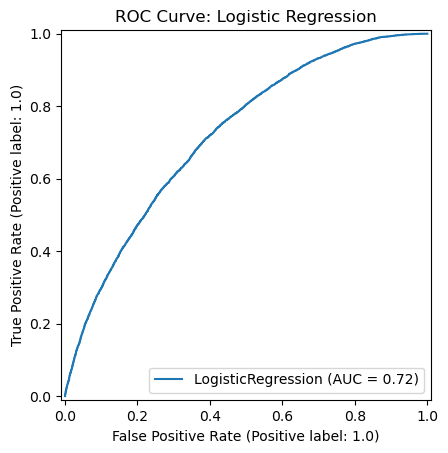

--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.76      0.77     11423
         1.0       0.77      0.80      0.78     11422

    accuracy                           0.78     22845
   macro avg       0.78      0.78      0.78     22845
weighted avg       0.78      0.78      0.78     22845

AUC Score: 0.8614795826824796


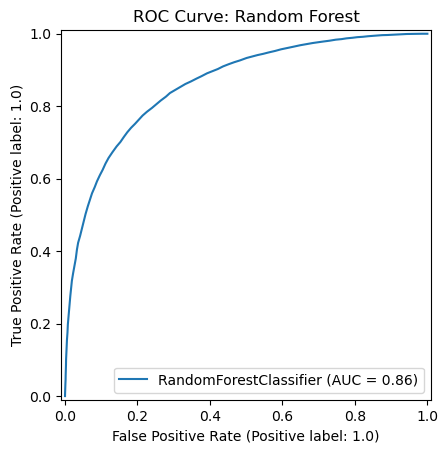

--- XGBoost ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.78     11423
         1.0       0.79      0.74      0.76     11422

    accuracy                           0.77     22845
   macro avg       0.77      0.77      0.77     22845
weighted avg       0.77      0.77      0.77     22845

AUC Score: 0.8603791523774948


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)  # Added SVM
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC calculation

    print(f"--- {name} ---")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_prob))

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve: {name}")
    plt.show()

--- XGBoost ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.78     11423
         1.0       0.79      0.74      0.76     11422

    accuracy                           0.77     22845
   macro avg       0.77      0.77      0.77     22845
weighted avg       0.77      0.77      0.77     22845

AUC Score: 0.8603791523774948


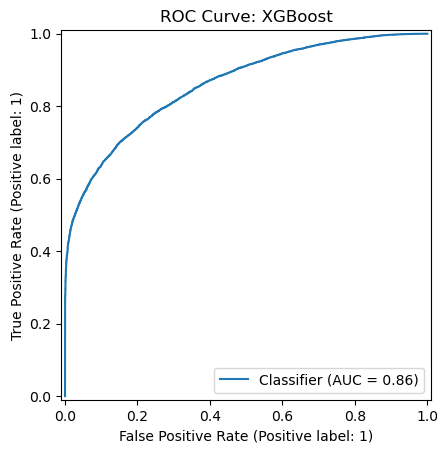

In [76]:
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

# Train Model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get class 1 probabilities

# Evaluate Model
print(f"--- {name} ---")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve (Fixed)
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title(f"ROC Curve: {name}")
plt.show()



Feature Importance Analysis 

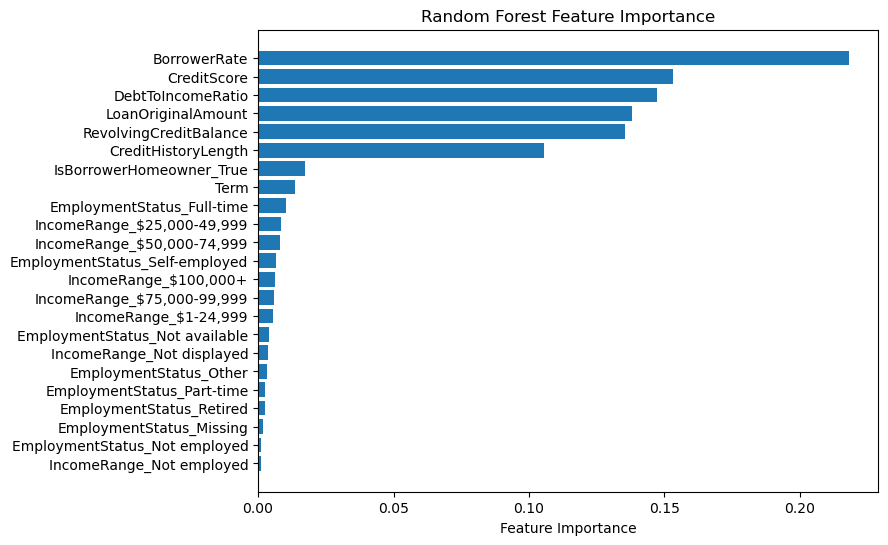

 99%|===================| 22730/22845 [01:03<00:00]        

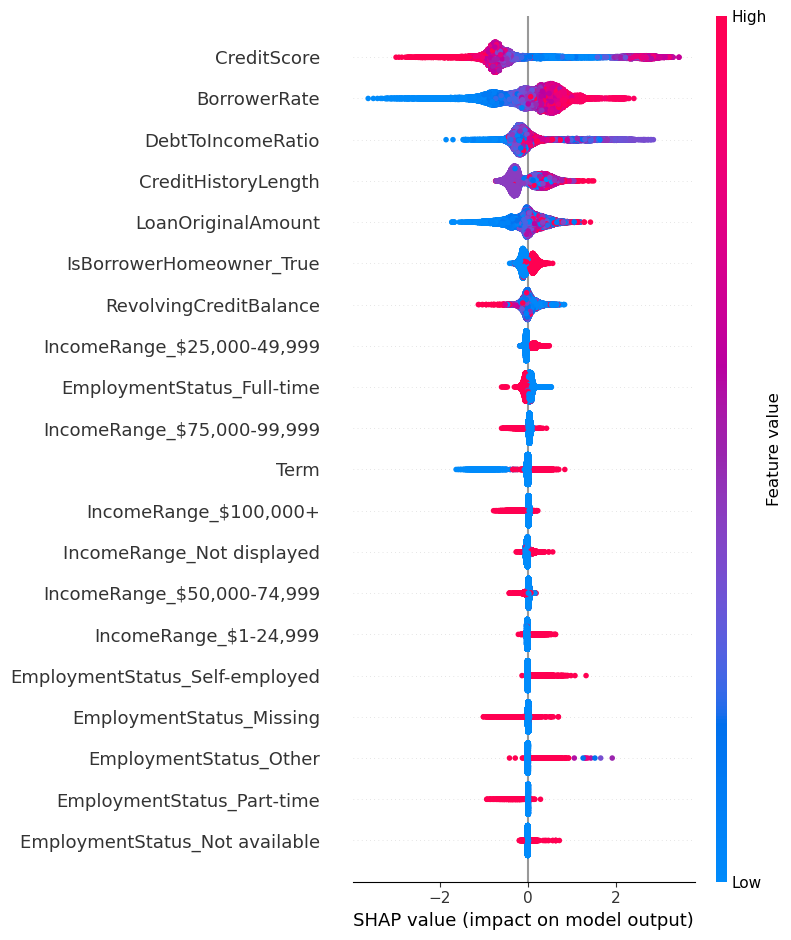

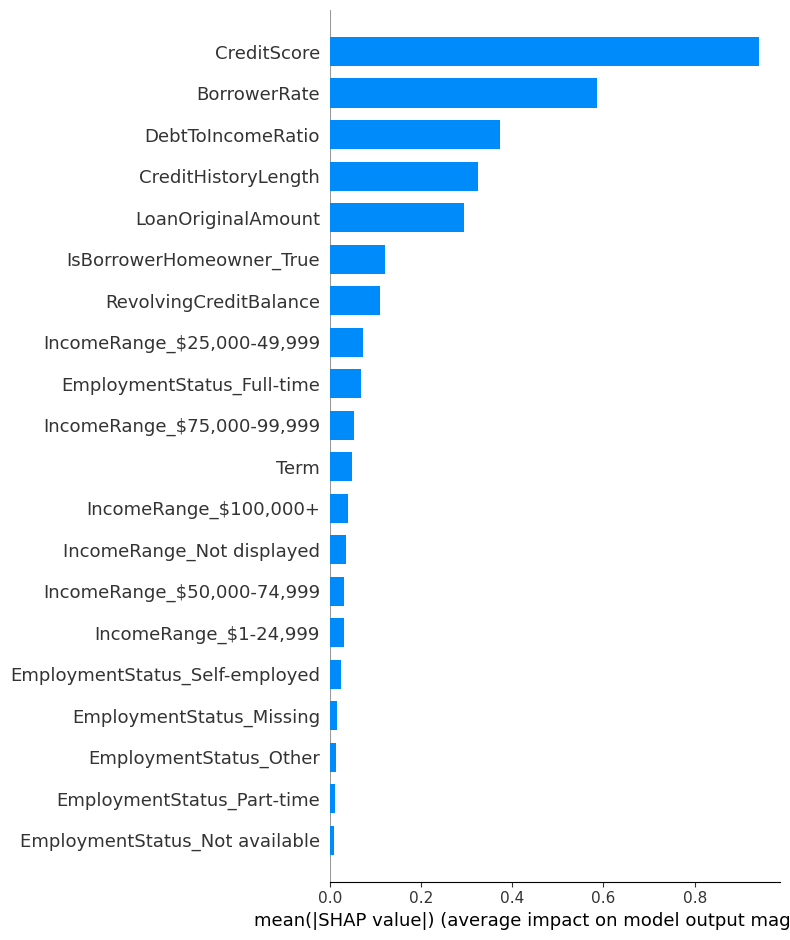

Using 53303 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Feature importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# SHAP Analysis for XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# SHAP KernelExplainer for SVM
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test[:100])  # Sampling 100 for computational efficiency

# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_test.iloc[:100])  # Class 1 (default prediction)

# SHAP Bar Plot
shap.summary_plot(shap_values[1], X_test.iloc[:100], plot_type="bar")
